In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score



#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:

Realizar el ajuste o ajustes de los modelos

Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

In [2]:
df_esta = pd.read_csv("./Datos/tiempo_esta_cod.csv", index_col = 0)
df_esta.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Mainly Clear,mes,hora
0,-0.755162,-0.366931,1.320679,-0.201398,-1.722126,-1.646271,0,0,3
1,-0.645784,-0.430150,0.616199,2.334455,-0.673565,-2.485747,0,0,0
2,-0.662611,-0.484338,0.488112,2.467921,-0.673565,-2.485747,0,0,0
3,-0.729921,-0.556589,0.488112,2.334455,-0.673565,-2.485747,0,0,0
4,-0.755162,-0.556589,0.552155,2.334455,-0.673565,-2.485747,0,0,0


In [3]:
df_sin_esta = pd.read_csv("./Datos/tiempo_sin_esta_cod.csv", index_col = 0)
df_sin_esta.head()

,Weather_Mainly Clear,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,0,2.6,-0.2,82,13,12.9,99.930
1,0,3.9,-0.9,71,32,25.0,99.315
2,0,3.7,-1.5,69,33,25.0,99.315
3,0,2.9,-2.3,69,32,25.0,99.315
4,0,2.6,-2.3,70,32,25.0,99.315


# Realización del modelo con variables codificadas y estandarizadas

Vamos a usar de variable respuesta (y) "Weather Mainly Clear":

0 es despejado/clear

1 es nuboso/cloudy

In [4]:
# separamos los datos en X e y

X1 = df_esta.drop(["Weather_Mainly Clear"], axis = 1)
y1 = df_esta["Weather_Mainly Clear"]

In [5]:
X1.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,mes,hora
0,-0.755162,-0.366931,1.320679,-0.201398,-1.722126,-1.646271,0,3
1,-0.645784,-0.430150,0.616199,2.334455,-0.673565,-2.485747,0,0
2,-0.662611,-0.484338,0.488112,2.467921,-0.673565,-2.485747,0,0
3,-0.729921,-0.556589,0.488112,2.334455,-0.673565,-2.485747,0,0
4,-0.755162,-0.556589,0.552155,2.334455,-0.673565,-2.485747,0,0


In [6]:
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: Weather_Mainly Clear, dtype: int64

Train-test split

In [7]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

Ajuste y predicción del modelo

In [8]:
# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

In [9]:
train_df_esta = pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train1)})
test_df_esta  = pd.DataFrame({'Real': y_test1,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.sample(10)

,Real,Predicted,Set
2235,1,1,Train
427,0,0,Train
2699,0,1,Train
439,0,1,Test
1211,0,1,Train
2263,1,0,Train
674,1,1,Train
3118,1,1,Train
1226,0,1,Train
1144,1,1,Train


# Realización del modelo con variables sin estandarizar

In [10]:
df_sin_esta.head(5)

,Weather_Mainly Clear,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,0,2.6,-0.2,82,13,12.9,99.930
1,0,3.9,-0.9,71,32,25.0,99.315
2,0,3.7,-1.5,69,33,25.0,99.315
3,0,2.9,-2.3,69,32,25.0,99.315
4,0,2.6,-2.3,70,32,25.0,99.315


In [11]:
# separamos los datos en X e y

X2 = df_sin_esta.drop(["Weather_Mainly Clear"], axis = 1)
y2 = df_sin_esta["Weather_Mainly Clear"]

In [12]:
X2

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,2.6,-0.2,82,13,12.9,99.930
1,3.9,-0.9,71,32,25.0,99.315
2,3.7,-1.5,69,33,25.0,99.315
3,2.9,-2.3,69,32,25.0,99.315
4,2.6,-2.3,70,32,25.0,99.315
...,...,...,...,...,...,...
4170,-13.4,-16.5,77,26,25.0,101.470
4171,-13.8,-16.5,80,20,25.0,101.500
4172,-13.7,-16.3,81,19,25.0,101.540
4173,-12.1,-15.1,78,28,25.0,101.520


In [13]:
y2

0       0
1       0
2       0
3       0
4       0
       ..
4170    1
4171    1
4172    1
4173    0
4174    0
Name: Weather_Mainly Clear, Length: 4175, dtype: int64

In [14]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [15]:
# definimos la regresión logistica

log_reg_sin_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_sin_esta.fit(x_train2,y_train2)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_sin_esta = log_reg_sin_esta.predict(x_train2)

# obtenemos las predicciones para el conjunto de test
y_pred_test_sin_esta = log_reg_sin_esta.predict(x_test2)

In [16]:
train_df = pd.DataFrame({'Real': y_train2, 'Predicted': y_pred_train_sin_esta, 'Set': ['Train']*len(y_train2)})
test_df  = pd.DataFrame({'Real': y_test2,  'Predicted': y_pred_test_sin_esta,  'Set': ['Test']*len(y_test2)})
resultados2 = pd.concat([train_df,test_df], axis = 0)
resultados2.sample(10)

,Real,Predicted,Set
1084,1,0,Train
906,0,0,Train
2626,1,0,Train
290,0,1,Train
730,0,0,Train
3967,0,1,Test
2570,0,1,Train
2092,1,1,Train
1736,0,0,Test
2322,0,1,Train


# Matriz de confusión

Vamos a usar de variable respuesta (y) "Weather Mainly Clear":

0 es despejado/clear

1 es nuboso/cloudy

Verdaderos positivos. Predecimos sol y hace sol.  Real 0, predicho 0

Verdaderos negativos. Predecimos nubes y hacen nubes. Real 1, predicho 1

Falsos positivos. Predecimos sol y está nublado. Real 1, predicho 0

Falsos negativos. Predecimos nublado y hace sol. Real 0, predicho 1

Somos meteorólogas. Nos interesa predecir que está nublado y que al final haga sol (para que no nos denuncien). Nos interesa tener más "falsos negativos"

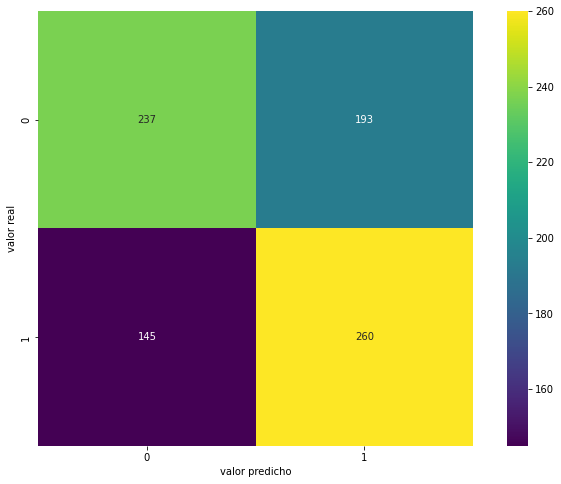

In [17]:
# MATRIZ DE CONFUSIÓN PARA DATOS ESTANDARIZADOS

mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

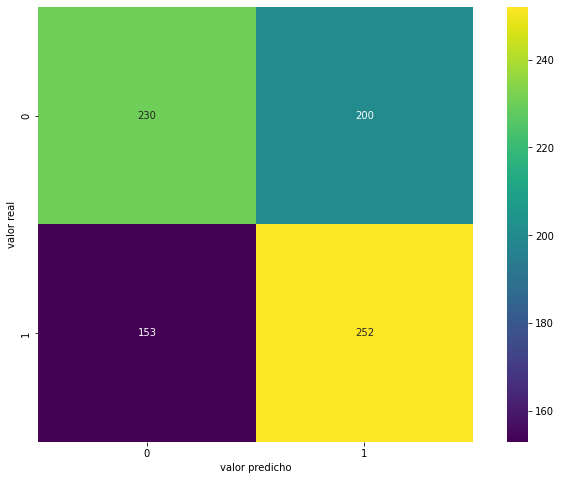

In [18]:
# MATRIZ DE CONFUSIÓN PARA DATOS ESTANDARIZADOS

mat_lr2 = confusion_matrix(y_test2, y_pred_test_sin_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr2, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

# Métricas

In [19]:
# vamos a hacernos una función para sacar las métricas igual que hicimos con al regresión lineal.


def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [20]:
results_logistic_esta = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "RLog estandarizadas")
results_logistic_esta

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.595210,0.573951,0.641975,0.606061,0.192475,test,RLog estandarizadas
1,0.614072,0.611472,0.664315,0.636799,0.226614,train,RLog estandarizadas


In [21]:
results_logistic_sin_esta = metricas(y_test2, y_pred_test_sin_esta, y_train2, y_pred_train_sin_esta, "RLog sin estandarizar")
results_logistic_sin_esta

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.577246,0.557522,0.622222,0.588098,0.156578,test,RLog sin estandarizar
1,0.608383,0.605249,0.664315,0.633408,0.215048,train,RLog sin estandarizar


In [22]:
resultados_rlog = pd.concat([results_logistic_esta, results_logistic_sin_esta], axis = 0)
resultados_rlog

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.595210,0.573951,0.641975,0.606061,0.192475,test,RLog estandarizadas
1,0.614072,0.611472,0.664315,0.636799,0.226614,train,RLog estandarizadas
0,0.577246,0.557522,0.622222,0.588098,0.156578,test,RLog sin estandarizar
1,0.608383,0.605249,0.664315,0.633408,0.215048,train,RLog sin estandarizar


In [23]:
resultados_rlog.to_csv("./Datos/resultados_rlog.csv")

Los kappas no son muy altos, pero la capacidad de decisión entre "mainly clear" y "mostly cloudy" con estas variables es reducida

No consideramos que estén los modelos ni overfitting, ni underfitting